### **Machine Learning - K-nearest neighbors (KNN)**
- **KNN** is a **supervised machine learning** algorithm for classifying data points ( *observations*),  
based on the values of the closest existing points
- **k** is the number of nearby points -- neighbors -- to use in the comparison
- **k** is often set to 5, but 3 is also commonly used. 1 is considered too low



In [142]:
# 1. Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp

# 2. import KNN model
from sklearn.neighbors import KNeighborsClassifier

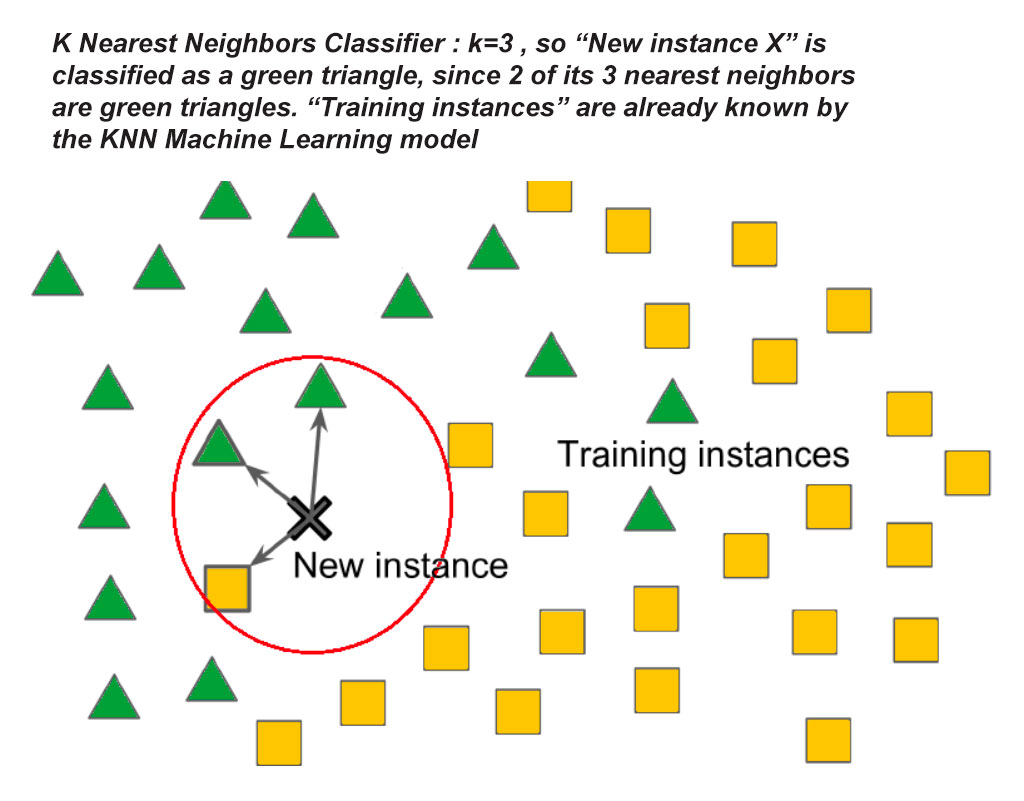

In [143]:
# 3. Display the KNN.jpg image
Image("../images/KNN.jpg",width=450)

In [144]:
# 4. define some points to plot, as lists x and y
#.   and make another list of classes, either 0 or 1, 
#.   to assign to the plotted points

x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

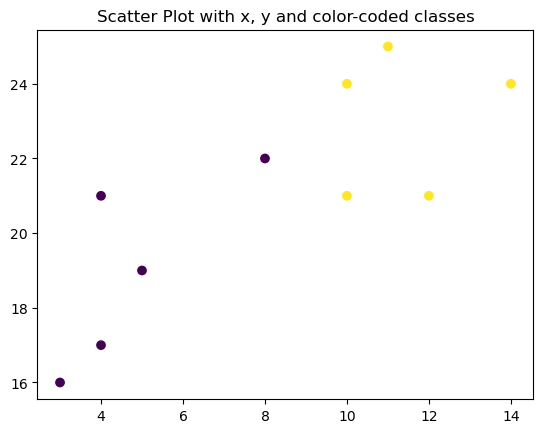

In [145]:
# 5. Scatter plot the points; 
plt.scatter(x=x, y=y, c=classes)
plt.title("Scatter Plot with x, y and color-coded classes")
plt.show()

**How to loop more than one list at the same time:**
- **for i, item enumerate(list)** gives access to the index as you loop
    - loop one list, access corresponding item by index in another list

In [146]:
# 6. Make two lists, fruits and veggies
fruits = ['apple', 'banana', 'cherry', 'watermelon', 'kiwi', 'mango']

veggies = ['carrot', 'celery', 'beet', 'kale', 'tomato', 'cucumber']

In [147]:
# loop the fruits, make jellybeans
jellybeans = []
for fru in fruits:
    jellybeans.append(fru + " jellybean")

pp.pprint(jellybeans)

['apple jellybean',
 'banana jellybean',
 'cherry jellybean',
 'watermelon jellybean',
 'kiwi jellybean',
 'mango jellybean']


In [148]:
# make 2-flavor juice: one fruit, one veggie: corresponding items only: "apple-carrot juice", etc.
juices = []
i = 0
for fru in fruits:
    juices.append(f"{fru}-{veggies[i]} juice")
    i += 1

pp.pprint(juices)

['apple-carrot juice',
 'banana-celery juice',
 'cherry-beet juice',
 'watermelon-kale juice',
 'kiwi-tomato juice',
 'mango-cucumber juice']


-Using **enumerate()**, make fruit-veggie smoothies from corresponding items in the two lists

In [149]:
# make 2-flavor juices again BUT using enumerate()
# corresponding items only: "apple-carrot juice", etc.
juices = []
for i, fru in enumerate(fruits):
    juices.append(f"{fru}-{veggies[i]} juice")

pp.pprint(juices)

['apple-carrot juice',
 'banana-celery juice',
 'cherry-beet juice',
 'watermelon-kale juice',
 'kiwi-tomato juice',
 'mango-cucumber juice']


In [150]:
# using enumerate() to get index while staying in just one list:
# make 2 ingredient fruits smoothies of only consecutive fruits: 'apple-banana'
smoothies = []
for i, fru in enumerate(fruits):
    # stop making smoothies at 'kiwi-mango'
    # kiwi is one less than last index (5)
    # last index is one less than length
    if i<len(fruits)-1: # i must be less than 5
        smoothies.append(f'{fru}-{fruits[i+1]}')
pp.pprint(smoothies)

['apple-banana',
 'banana-cherry',
 'cherry-watermelon',
 'watermelon-kiwi',
 'kiwi-mango']


- **zip()**: another way to loop more than one list at the same time:
    - **for list1_item,list2_item in zip(list1, list2)** loops two lists at at same time
    - zip gives access to corresponding items in each list

In [151]:
# 12. Same as above, but using zip() instead of enumerate()
# advantage of zip: does NOT need index to look up list item
juices = []
for fru, veg in zip(fruits, veggies):
    juices.append(f'{fru}-{veg} juice')

print(juices)

['apple-carrot juice', 'banana-celery juice', 'cherry-beet juice', 'watermelon-kale juice', 'kiwi-tomato juice', 'mango-cucumber juice']


**KNN algorithm** is trained on a set of data points in the form of a list of tuples:  
[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)],  
 so we need to make a list of tuples from the x and y lists

**zip(list1, list2)** returns a zip object of tuples,  
where each tuple has the corresponding items from each list.

**list_of_tuples = list(zip(list1, list2))** returns a list of the tuples

In [152]:
zipped_fru_veg = zip(fruits,veggies)
print(zipped_fru_veg) # <zip object at 0x7fa6a1bea0c0>
zipped_fru_veg = list(zipped_fru_veg)
pp.pprint(zipped_fru_veg)

[('apple', 'carrot'),
 ('banana', 'celery'),
 ('cherry', 'beet'),
 ('watermelon', 'kale'),
 ('kiwi', 'tomato'),
 ('mango', 'cucumber')]


In [153]:
# 13. Redeclare x, y and classes again, for ease of reference:
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [154]:
# 14. Using zip, loop x and y at the same time
# and save their product into a new list called products:
products = []
for xn, yn in zip(x, y):
    products.append(xn * yn)

print(products) # [84, 95, 240, 68, 48, 275, 336, 176, 210, 252]

[84, 95, 240, 68, 48, 275, 336, 176, 210, 252]


In [155]:
# Loop x and y at same time using zip
# make this list of corresponding x-y pairs :
# just bundle each x, y in parentheses and append to list
# save the 10 (x,y) tuples to a new list called scatter_dots:

# 15. Declare a new list called scatter_dots:
scatter_dots = []

# 16. Loop both x and y lists at once, with zip()
# declare _x and _y to be the current value of x and y
for xn, yn in zip(x,y):
  # 17. Append a tuple as (xn,yn) to the new list:
  scatter_dots.append((xn, yn))

print(scatter_dots) # [(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)],

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


In [156]:
# 18. Make the list of (x,y) tuples again, BUT without a loop: just zip up the x and y values into a "zip object", set equal to variable
# pass zip() to list() to unpack the list of tuples:
scatter_dots = list(zip(x,y))
pp.pprint(scatter_dots)

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (8, 22),
 (10, 21),
 (12, 21)]


**KNeighborsClassifier(n_neighbors)** returns a knn machine learning model for training and predicting using k-nearest neighbors algorithm

In [157]:
# 20. Instantiate a KNeighborsClassifier model
#    set n_neighbors to 1 for this first example:
# n_neighbors=3 is the default if you leave () blank
knn_model = KNeighborsClassifier(n_neighbors=5)

**training the knn model**.
- **knn.fit(data_points, classes)** method is used to train the model
- fit takes two arguments:
  - a list of tuples of (x,y) data points
  - a list of corresponding classes (labels)
- the goal of training the model is to be able to show it new data points  
and have it assign the correct class

In [158]:
# 21. Train (fit) the model:
knn_model.fit(scatter_dots,classes)

KNeighborsClassifier()

**testing the knn model**.
- **knn.predict(data_point)** method asks the model to classify as yet unclassified data points
- the classification, not being a 100% certainty, is called a prediction
- predict takes one arguments: an (x,y) data point to classify
- the method returns the predicted class for that data point

In [159]:
# 22. Make up a new (x,y) tuple; this is an unclassified point, which we will ask the model to classify.
x_new = 9
y_new = 19

# 23. Append new x and y to their respective lists:
x.append(x_new)
print(x) # x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9]
y.append(y_new)
print(y) # y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19]

[4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9]
[21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19]


Text(8.2, 17.9, 'unclassified\nnew point')

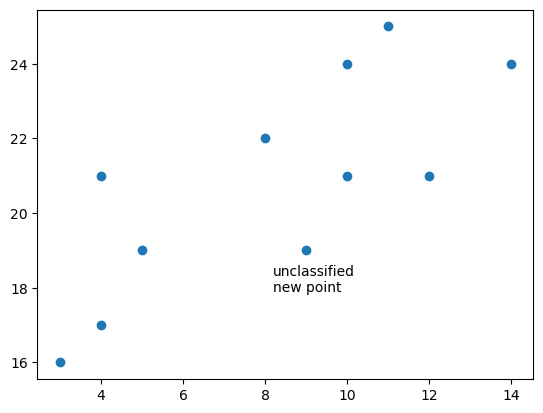

In [160]:
# 24. Re-do the scatter plot, which now includes the new data point.
#     We cannot set c=classes in the new scatter plot because classes
#     list is not the same length
#     Assign text to the new point
plt.scatter(x,y)
plt.text(x_new-0.8,y_new-1.1,'unclassified\nnew point')

In [161]:
# 25. Assign a unique class (2) to the new data point, so that it stands out with a unique color. This is just to get all 3 lists (x,y,classes)
# to be the same length for the scatter() method.
# After that, we will have the model predict the class (either 0 or 1)
# The 3rd class/color is just temporary for visualization purposes
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1] # reset original 10 classes
classes.append(2) # add 2 as 3rd class (3rd color)
print(classes) # [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2]

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2]


Text(8.2, 17.9, 'unclassified\nnew point')

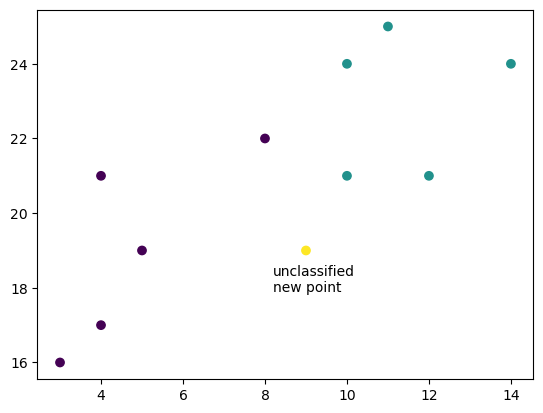

In [162]:
# 26. Re-do the scatter plot, now with 3 colors for 3 classes (0,1,2)
#     only the new point has the new class/color 2
plt.scatter(x,y,c=classes)
plt.text(x_new-0.8,y_new-1.1,'unclassified\nnew point')
# a third color in addtion to 0 and 1

In [163]:
# 27. Now to assign one class or the other -- 0 or 1 -- to the new point.
#     Make a new (x,y) data point using the two new x and y values (9,19)
#     This (x,y) tuple, wrapped in [] will be "fed" to the model's predict method
new_dot = (x_new,y_new)
print(type(new_dot), new_dot, len(new_dot))

<class 'tuple'> (9, 19) 2


In [164]:
# 28. Pass the new_data_pt to the model's predict() method.
#     the method returns a class (0 or 1) for the new data point
#     these are the only two classes the model was trained on,
#     so these are the only two possible classification results
#     the provided data needs to be a tuple wrapped in a list,
#     so put [] around new_dot tuple:
#     the model returns a list of, in this case, just the one item, 
#     so the result is a one-item list: [0] or [1]
predicted_dot_class_list = knn_model.predict( [ new_dot ] )
print('predicted_dot_class_list:', predicted_dot_class_list)
#     get the 0 or 1 by itself from the list at index 0:
predicted_dot_class = predicted_dot_class_list[0]
print('predicted_dot_class for (9,19):',predicted_dot_class)

predicted_dot_class_list: [1]
predicted_dot_class for (9,19): 1


In [165]:
# 29. Add the new prediction to the classes list and replot it.
#     Replace the 2 at the end of classes list with the predicted class
#.    append just the 1 -- NOT the list [1]
classes[-1] = predicted_dot_class
print(classes)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


Text(8.2, 17.9, 'predicted\nnew class')

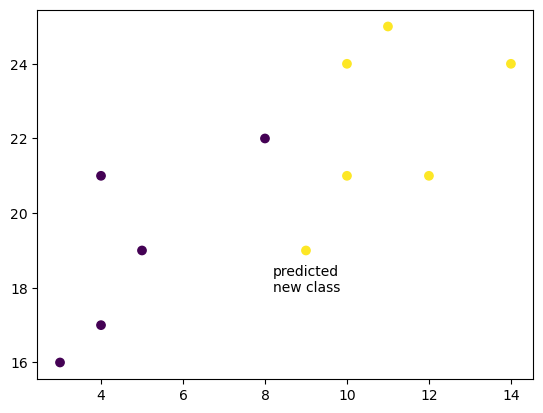

In [166]:
# 30. Re-do the scatter plot to now include the newly classified point, which
#     we can still label with text -- only now, the point has been assigned
#     the color of class 1
plt.scatter(x,y,c=classes)
plt.text(x_new-0.8,y_new-1.1,'predicted\nnew class')
# 'newly classified point'

In [167]:
print('x:',x, len(x))
print('y:',y, len(y))
print('c:',classes, len(classes))

x: [4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9] 11
y: [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19] 11
c: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1] 11


**n_neighbors=3** setting number of nearest neighbors

- **n_neighbors=3** considers the 3 nearest neighbors
    - a majority 2 out of 3 "vote" prevails
- **n_neighbors=5** considers the 5 nearest neighbors
    - a majority 5 out of 5 "vote" prevails

In [168]:
# Make a new dot that could possibly be classified differently by n_neighbors=3 vs n_neighbors=3
new_x = 7
new_y = 20
new_dot = (new_x, new_y)
# append the new x,y values to their respective lists:
x.append(new_x)
print(x, len(x))
y.append(new_y)
print(y, len(y))

[4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9, 7] 12
[21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19, 20] 12


In [169]:
# assign a temporary class (2) for the new dot:
classes.append(2)
print(classes, len(classes))

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2] 12


Text(6.2, 18.9, 'unclassified\nnew point')

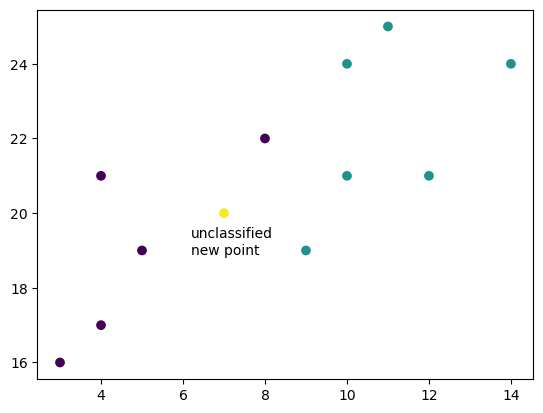

In [170]:
# re-run the scatter plot to see the new, unclassified dot:
plt.scatter(x,y,c=classes)
plt.text(new_x-0.8,new_y-1.1,'unclassified\nnew point')

In [171]:
# predict the new dot--looks purple (0), 
# but we want the model to confirm that:
predicted_class = knn_model.predict([new_dot])[0]
print('predicted_class:',predicted_class)

predicted_class: 0


In [172]:
# update the classes list w the predicted class (0)
classes[-1] = predicted_class
print('classes:',classes)

classes: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]


Text(6.2, 18.9, 'predicted\nnew class')

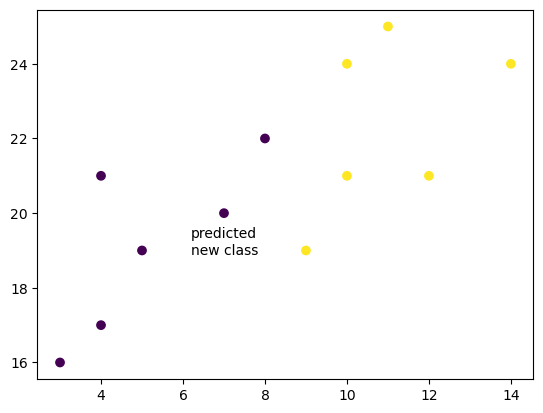

In [173]:
# re-do the scatter plot with the newly classified purple point (0)
plt.scatter(x,y,c=classes)
plt.text(new_x-0.8,new_y-1.1,'predicted\nnew class')